In [1]:
# Importing Useful Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

plt.style.use('seaborn')

/var/folders/21/vgybxt6529g5wrtxj6dvczdm0000gn/T/ipykernel_5995/2603690536.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
# Loading the dataset
df = pd.read_csv("laptopPrice.csv")

In [3]:
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [4]:
# Renaming Some of the Columns
df = df.rename(columns={'brand':'Brand' , 'processor_brand':'Processor Brand'
                       
                  ,'processor_name' :'Processor Name',
                   'processor_gnrtn': 'Processor Generation',
                   'ram_gb':'Ram in Gb',
                    'ram_type':'Ram Type',
                    'ssd':'SSD',
                    'hdd':'HDD',
                    'graphic_card_gb':'Graphic card in Gb',
                    'rating':'Ratings'
                       })

In [5]:
df

,Brand,Processor Brand,Processor Name,Processor Generation,Ram in Gb,Ram Type,SSD,HDD,os,os_bit,Graphic card in Gb,weight,warranty,Touchscreen,msoffice,Price,Ratings,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


# Converting some string type columns into int

In [6]:
df['Ram in Gb'].str.split(" ")

0      [4, GB]
1      [4, GB]
2      [4, GB]
3      [8, GB]
4      [4, GB]
        ...   
818    [4, GB]
819    [4, GB]
820    [4, GB]
821    [4, GB]
822    [8, GB]
Name: Ram in Gb, Length: 823, dtype: object

In [7]:
df['Ram in Gb'] = df['Ram in Gb'].str.split(" ").str.get(0)

In [8]:
df['Ram in Gb'] = df['Ram in Gb'].astype(int)

In [9]:
df['SSD'].str.split(" ")

0         [0, GB]
1         [0, GB]
2         [0, GB]
3       [512, GB]
4         [0, GB]
          ...    
818    [1024, GB]
819    [1024, GB]
820    [1024, GB]
821    [1024, GB]
822     [512, GB]
Name: SSD, Length: 823, dtype: object

In [10]:
df['SSD'] = df['SSD'].str.split(" ").str.get(0)

In [11]:
df['SSD'] = df["SSD"].astype(int)

In [12]:
 df['HDD'].str.split(" ")

0      [1024, GB]
1      [1024, GB]
2      [1024, GB]
3         [0, GB]
4       [512, GB]
          ...    
818       [0, GB]
819       [0, GB]
820       [0, GB]
821       [0, GB]
822       [0, GB]
Name: HDD, Length: 823, dtype: object

In [13]:
df['HDD'] = df['HDD'].str.split(" ").str.get(0)

In [14]:
df['HDD'] = df['HDD'].astype(int)

In [15]:
df['os_bit'].unique()

array(['64-bit', '32-bit'], dtype=object)

In [16]:
df['os_bit'].str.split("-")

0      [64, bit]
1      [64, bit]
2      [64, bit]
3      [32, bit]
4      [64, bit]
         ...    
818    [64, bit]
819    [64, bit]
820    [64, bit]
821    [64, bit]
822    [64, bit]
Name: os_bit, Length: 823, dtype: object

In [17]:
df['os_bit'] = df['os_bit'].str.split("-").str.get(0)

In [18]:
df['os_bit'] = df['os_bit'].astype(int)

In [19]:
df['Graphic card in Gb'].unique()

array(['0 GB', '2 GB', '4 GB', '6 GB', '8 GB'], dtype=object)

In [20]:
df['Graphic card in Gb'].str.split(" ")

0      [0, GB]
1      [0, GB]
2      [0, GB]
3      [2, GB]
4      [0, GB]
        ...   
818    [0, GB]
819    [0, GB]
820    [4, GB]
821    [4, GB]
822    [0, GB]
Name: Graphic card in Gb, Length: 823, dtype: object

In [21]:
df['Graphic card in Gb'] = df['Graphic card in Gb'].str.split(" ")

In [22]:
df['Graphic card in Gb'] = df['Graphic card in Gb'].str.get(0)

In [23]:
df

,Brand,Processor Brand,Processor Name,Processor Generation,Ram in Gb,Ram Type,SSD,HDD,os,os_bit,Graphic card in Gb,weight,warranty,Touchscreen,msoffice,Price,Ratings,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8,DDR4,512,0,Windows,32,2,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4,DDR4,0,512,Windows,64,0,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64,0,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64,0,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64,4,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64,4,Casual,1 year,No,No,142990,3 stars,0,0


In [24]:
df['Graphic card in Gb'] = df['Graphic card in Gb'].astype(int)

In [25]:
df['Ratings'].str.split(" ")

0      [2, stars]
1      [3, stars]
2      [3, stars]
3      [3, stars]
4      [3, stars]
          ...    
818    [3, stars]
819    [3, stars]
820    [3, stars]
821    [3, stars]
822    [4, stars]
Name: Ratings, Length: 823, dtype: object

In [26]:
df['Ratings'] = df['Ratings'].str.split(" ").str.get(0)

In [27]:
df['Ratings'] = df['Ratings'].astype(int)

In [28]:
df.head()

,Brand,Processor Brand,Processor Name,Processor Generation,Ram in Gb,Ram Type,SSD,HDD,os,os_bit,Graphic card in Gb,weight,warranty,Touchscreen,msoffice,Price,Ratings,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,34649,2,3,0
1,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,38999,3,65,5
2,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,39999,3,8,1
3,ASUS,Intel,Core i5,10th,8,DDR4,512,0,Windows,32,2,Casual,No warranty,No,No,69990,3,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4,DDR4,0,512,Windows,64,0,Casual,No warranty,No,No,26990,3,0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Brand                 823 non-null    object
 1   Processor Brand       823 non-null    object
 2   Processor Name        823 non-null    object
 3   Processor Generation  823 non-null    object
 4   Ram in Gb             823 non-null    int64 
 5   Ram Type              823 non-null    object
 6   SSD                   823 non-null    int64 
 7   HDD                   823 non-null    int64 
 8   os                    823 non-null    object
 9   os_bit                823 non-null    int64 
 10  Graphic card in Gb    823 non-null    int64 
 11  weight                823 non-null    object
 12  warranty              823 non-null    object
 13  Touchscreen           823 non-null    object
 14  msoffice              823 non-null    object
 15  Price                 823 non-null    in

In [30]:
df.describe()

,Ram in Gb,SSD,HDD,os_bit,Graphic card in Gb,Price,Ratings,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,8.680437,452.121507,227.071689,59.761847,1.190765,76745.177400,3.562576,315.301337,37.609964
std,4.372408,316.662592,413.105282,10.853667,2.026902,45101.790525,0.567282,1047.382654,121.728017
min,4.000000,0.000000,0.000000,32.000000,0.000000,16990.000000,1.000000,0.000000,0.000000
25%,4.000000,256.000000,0.000000,64.000000,0.000000,46095.000000,3.000000,0.000000,0.000000
50%,8.000000,512.000000,0.000000,64.000000,0.000000,64990.000000,4.000000,17.000000,2.000000
75%,8.000000,512.000000,0.000000,64.000000,2.000000,89636.000000,4.000000,139.500000,18.000000
max,32.000000,3072.000000,2048.000000,64.000000,8.000000,441990.000000,5.000000,15279.000000,1947.000000


# Analyzing the dataset using various type of graphs

/var/folders/21/vgybxt6529g5wrtxj6dvczdm0000gn/T/ipykernel_5995/708458291.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


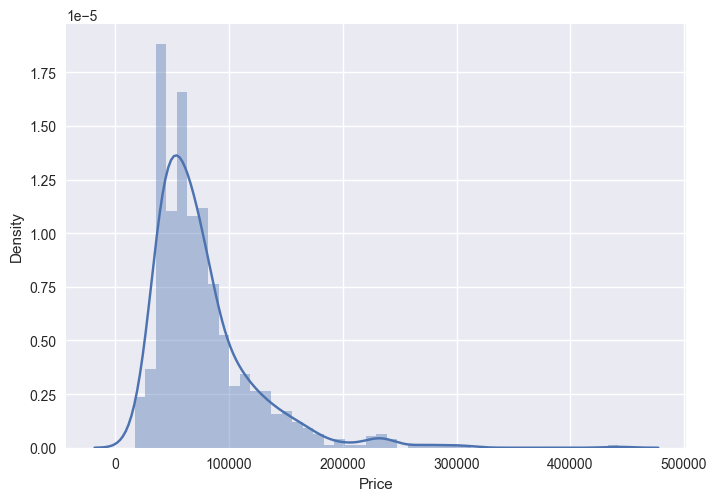

In [31]:
sns.distplot(df['Price'])
plt.show()

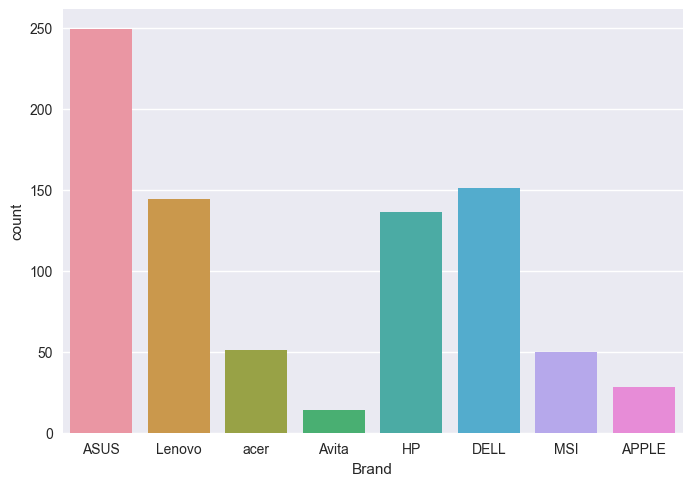

In [32]:
sns.countplot(x='Brand' , data=df)
plt.show()

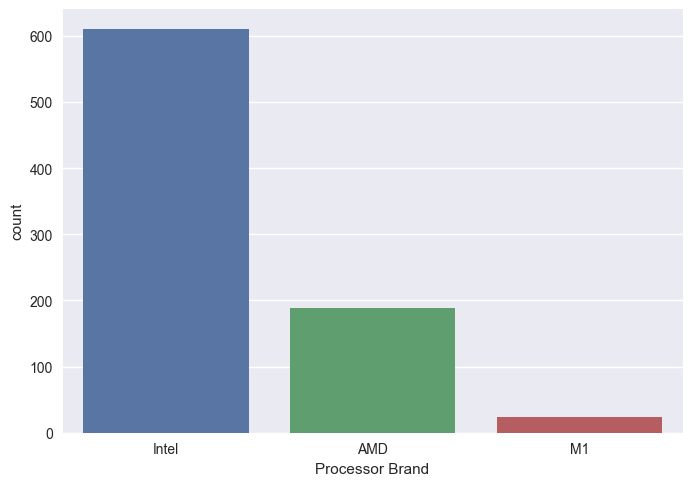

In [33]:
sns.countplot(x='Processor Brand' , data=df)
plt.show()

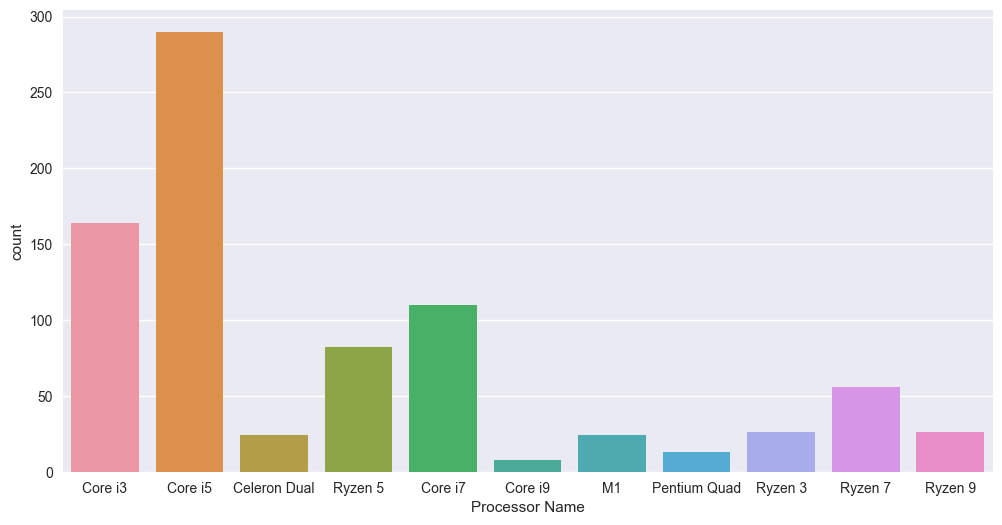

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(x='Processor Name' , data=df)
plt.show()

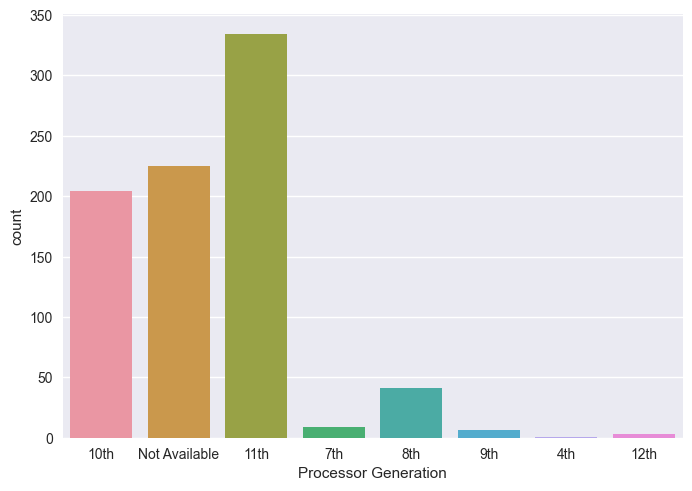

In [35]:
sns.countplot(x='Processor Generation' , data=df)
plt.show()

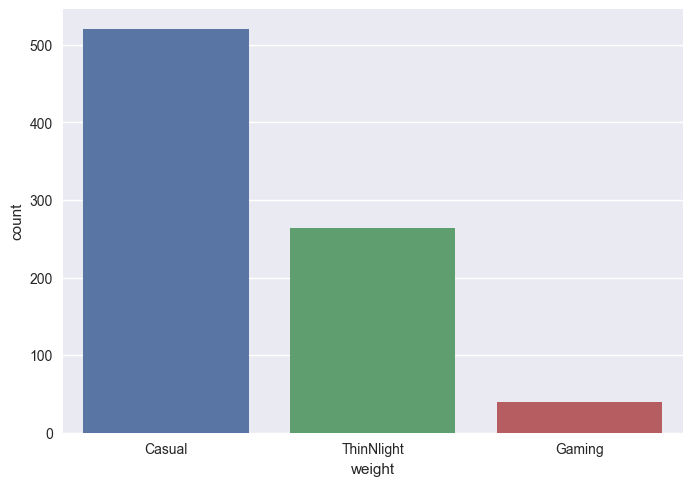

In [36]:
sns.countplot(x='weight' , data=df)
plt.show()

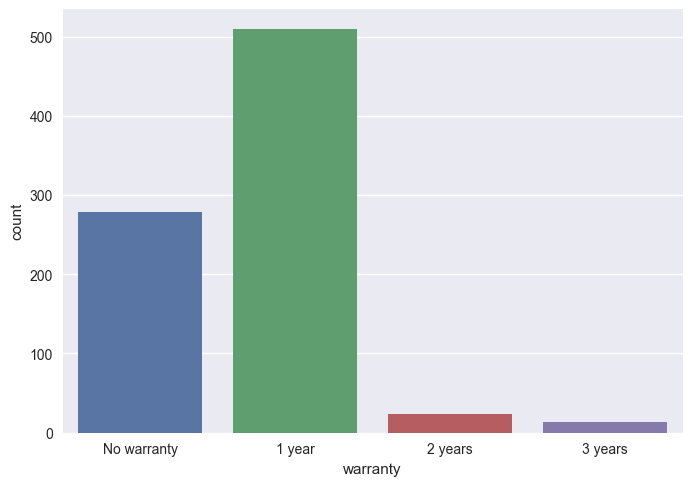

In [37]:
sns.countplot(x='warranty' , data=df)
plt.show()

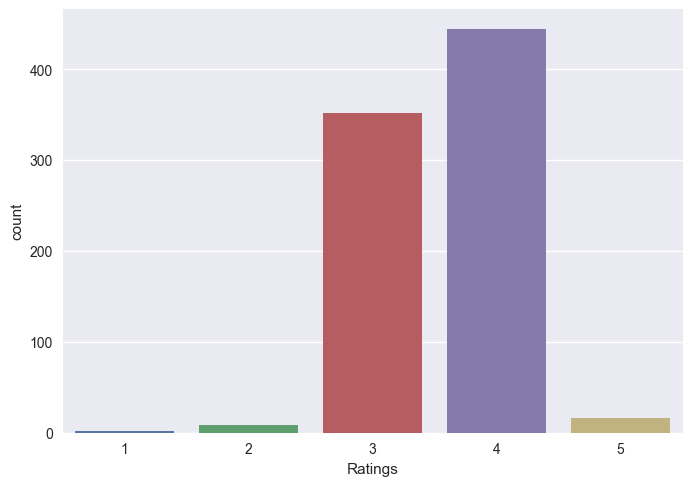

In [38]:
sns.countplot(x='Ratings' , data=df)
plt.show()

<AxesSubplot: xlabel='SSD', ylabel='Price'>

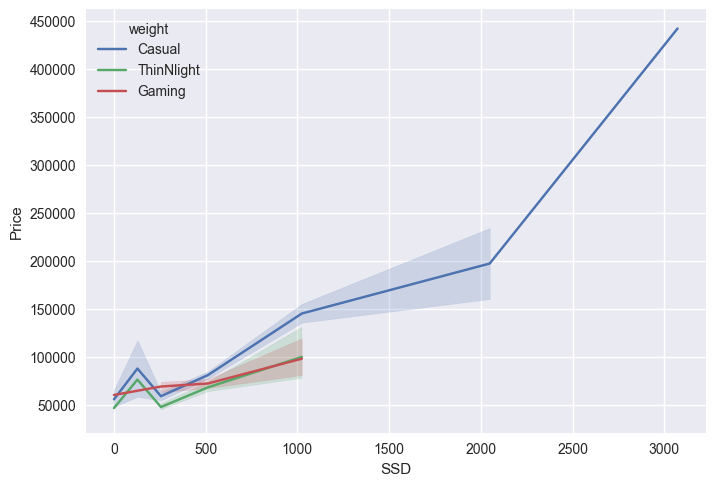

In [39]:
sns.lineplot(x='SSD' , y='Price' , hue = 'weight' , data=df)

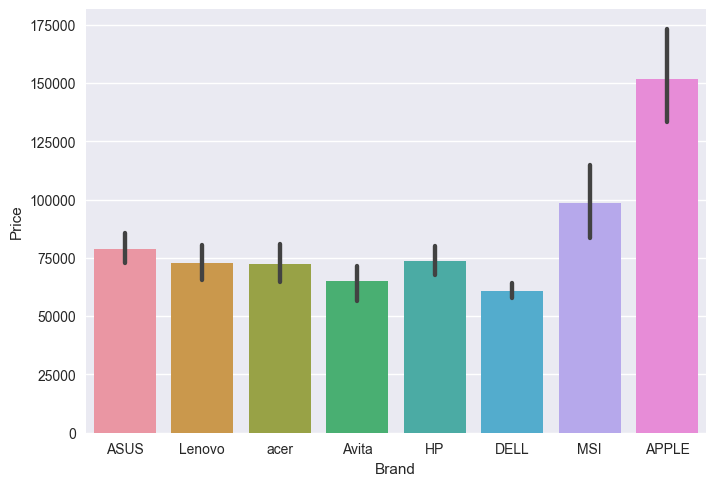

In [40]:
sns.barplot(x='Brand' , y='Price' , data=df)
plt.show()

<AxesSubplot: xlabel='Price'>

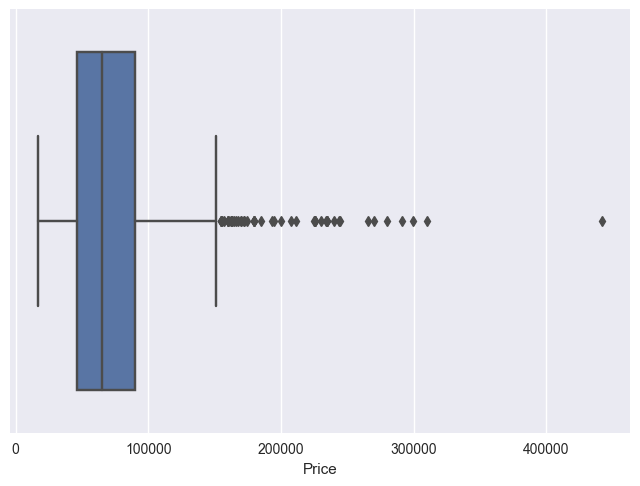

In [41]:
sns.boxplot(x='Price' , data=df)

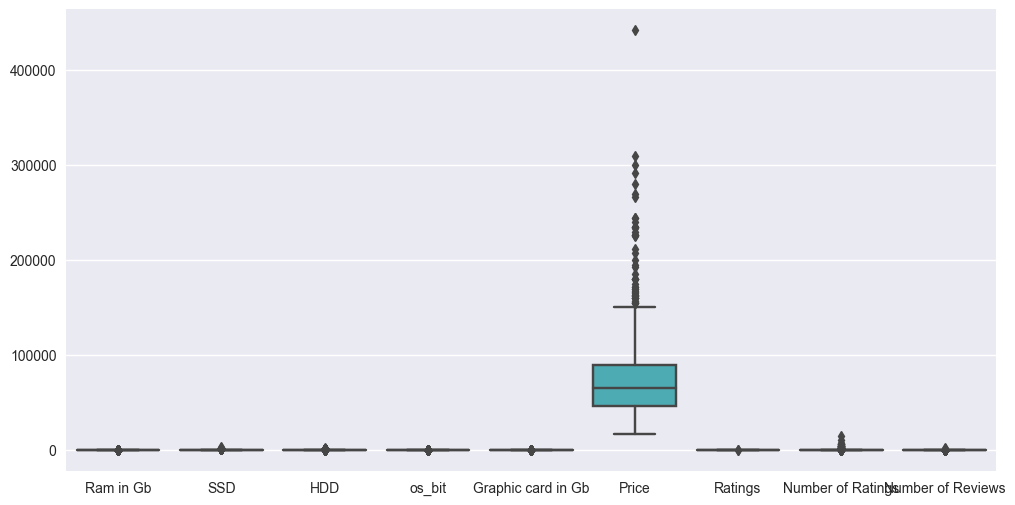

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.show()

In [43]:
df['Processor Generation'].replace('Not Available', df['Processor Generation'].mode()[0], inplace=True)

In [44]:
def remove_outlier_IQR(df, column):
    
    # sort values in ascending order in order to calculate the quartiles and the IQR 
    sorts = df[column].sort_values()
    
    Q1 = sorts.quantile(0.25)    #  25th percentile (first quartile)
    Q3 = sorts.quantile(0.75)    #  75th percentile (third quartile)
    IQR = Q3 - Q1
    
    lower_bound = sorts < (Q1-1.5*IQR)
    upper_bound = sorts > (Q3+1.5*IQR)
    # exlude rows from the dataframe above and below bounds
    df_final = df[~((lower_bound) | (upper_bound))].reset_index(drop=True)    
    
    return df_final

In [45]:
df = remove_outlier_IQR(df, "Price")
df = remove_outlier_IQR(df, "Number of Reviews")
df = remove_outlier_IQR(df, "Number of Ratings")

/var/folders/21/vgybxt6529g5wrtxj6dvczdm0000gn/T/ipykernel_5995/51913074.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_final = df[~((lower_bound) | (upper_bound))].reset_index(drop=True)


In [46]:
from sklearn import preprocessing

In [47]:
# Converting Object data types to Integer
for col in df.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    
    

In [48]:
df

,Brand,Processor Brand,Processor Name,Processor Generation,Ram in Gb,Ram Type,SSD,HDD,os,os_bit,Graphic card in Gb,weight,warranty,Touchscreen,msoffice,Price,Ratings,Number of Ratings,Number of Reviews
0,1,1,1,0,4,1,0,1024,2,64,0,0,3,0,0,34649,2,3,0
1,5,1,1,0,4,1,0,1024,2,64,0,0,3,0,0,38999,3,65,5
2,5,1,1,0,4,1,0,1024,2,64,0,0,3,0,0,39999,3,8,1
3,1,1,2,0,8,1,512,0,2,32,2,0,3,0,0,69990,3,0,0
4,1,1,0,1,4,1,0,512,2,64,0,0,3,0,0,26990,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,1,0,10,1,4,1,1024,0,2,64,0,0,0,0,0,135990,3,0,0
548,1,0,10,1,4,1,1024,0,2,64,0,0,0,0,0,144990,3,0,0
549,1,0,10,1,4,1,1024,0,2,64,4,0,0,0,0,149990,3,0,0
550,1,0,10,1,4,1,1024,0,2,64,4,0,0,0,0,142990,3,0,0


<AxesSubplot: >

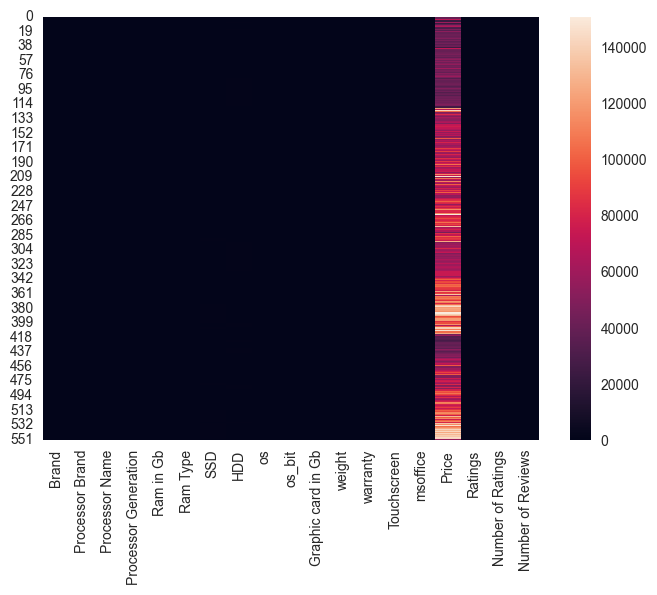

In [49]:
# Plotting the Heatmap of the dataset
sns.heatmap(df)

In [50]:
X = df[['Brand' , 'Processor Brand' , 'Processor Name' , 'Processor Generation' , 'Ram in Gb' ,'Ram Type' , 'SSD' , 'HDD' , 'os' ,'os_bit' , 'Graphic card in Gb' , 'weight' , 'warranty' , 'Touchscreen' ,'msoffice' , 'Ratings' , 'Number of Ratings','Number of Reviews']]

In [51]:
y = df['Price']

In [52]:
# Feature Scaling of X
def featurescaling(X):
    Xmean = X.mean(axis=0)
    Xstd = X.std(axis=0)
    
    return (X-Xmean)/Xstd

In [53]:
X = featurescaling(X)

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 552 non-null    float64
 1   Processor Brand       552 non-null    float64
 2   Processor Name        552 non-null    float64
 3   Processor Generation  552 non-null    float64
 4   Ram in Gb             552 non-null    float64
 5   Ram Type              552 non-null    float64
 6   SSD                   552 non-null    float64
 7   HDD                   552 non-null    float64
 8   os                    552 non-null    float64
 9   os_bit                552 non-null    float64
 10  Graphic card in Gb    552 non-null    float64
 11  weight                552 non-null    float64
 12  warranty              552 non-null    float64
 13  Touchscreen           552 non-null    float64
 14  msoffice              552 non-null    float64
 15  Ratings               5

In [55]:
X.mean(axis=0)

Brand                  -6.114272e-17
Processor Brand         0.000000e+00
Processor Name          5.148860e-17
Processor Generation   -7.723291e-17
Ram in Gb               1.158494e-16
Ram Type               -9.332309e-17
SSD                    -2.574430e-17
HDD                    -2.574430e-17
os                     -2.510069e-16
os_bit                  1.930823e-16
Graphic card in Gb      7.723291e-17
weight                  1.029772e-16
warranty                4.505253e-17
Touchscreen            -4.987959e-17
msoffice                3.218038e-17
Ratings                 9.654113e-17
Number of Ratings       2.574430e-17
Number of Reviews       5.148860e-17
dtype: float64

In [56]:
X.std(axis=0)

Brand                   1.0
Processor Brand         1.0
Processor Name          1.0
Processor Generation    1.0
Ram in Gb               1.0
Ram Type                1.0
SSD                     1.0
HDD                     1.0
os                      1.0
os_bit                  1.0
Graphic card in Gb      1.0
weight                  1.0
warranty                1.0
Touchscreen             1.0
msoffice                1.0
Ratings                 1.0
Number of Ratings       1.0
Number of Reviews       1.0
dtype: float64

# Feature Selection

In [57]:
from sklearn.feature_selection import SelectKBest

In [58]:
best_features = SelectKBest(k = 'all')
fit = best_features.fit(X,y)

In [59]:
fit.scores_

array([1.033189  , 1.26901784, 1.57206642, 1.83084299, 1.59231637,
       1.64731203, 3.31138963, 1.82199257, 3.38504294, 2.06721091,
       1.57958055, 1.43345866, 1.51343252, 1.45122633, 1.22163726,
       1.45282836, 0.91163332, 0.69132196])

In [60]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featurescore = pd.concat([dfcolumns , dfscores], axis= 1)

In [61]:
featurescore.columns = ['Feature Name' , 'Score']

In [62]:
featurescore

,Feature Name,Score
0,Brand,1.033189
1,Processor Brand,1.269018
2,Processor Name,1.572066
3,Processor Generation,1.830843
4,Ram in Gb,1.592316
5,Ram Type,1.647312
6,SSD,3.311390
7,HDD,1.821993
8,os,3.385043
9,os_bit,2.067211


In [63]:
featurescore.sort_values(by="Score" , ascending = False)

,Feature Name,Score
8,os,3.385043
6,SSD,3.311390
9,os_bit,2.067211
3,Processor Generation,1.830843
7,HDD,1.821993
5,Ram Type,1.647312
4,Ram in Gb,1.592316
10,Graphic card in Gb,1.579581
2,Processor Name,1.572066
12,warranty,1.513433


# Applying Linear Regression Algorithm

In [64]:
Xtrain , Xtest , ytrain , ytest = train_test_split(X,y , test_size=0.3,random_state=101)

In [65]:
model = LinearRegression()

In [66]:
model.fit(Xtrain,ytrain)

LinearRegression()

In [67]:
y_predict = model.predict(Xtest)

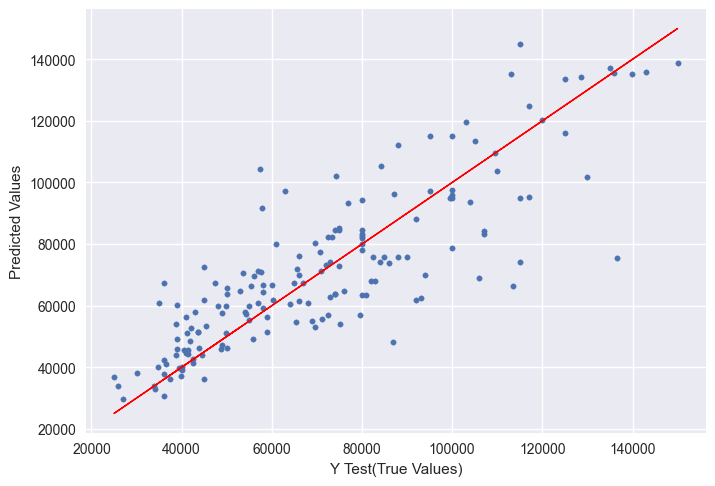

In [68]:
plt.scatter(ytest,y_predict,s=15)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')
plt.plot(ytest, ytest, color='red', lw=1)

plt.show()

In [69]:
from sklearn.metrics import r2_score,mean_squared_error

In [70]:
r2 = r2_score(ytest,y_predict)

In [71]:
r2

0.7058223996035543

In [72]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(ytest, y_predict))
print('MSE:', metrics.mean_squared_error(ytest, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, y_predict)))

MAE: 11271.813782934722
MSE: 236030890.09866774
RMSE: 15363.296849916938


In [73]:
print('Variance:', metrics.explained_variance_score(ytest, y_predict))

Variance: 0.7066849725423823


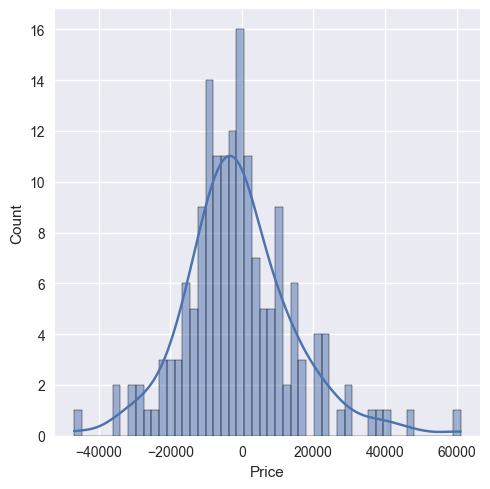

In [74]:
sns.displot((ytest-y_predict) , kde=True,bins=50)
plt.show()